In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from definitions import data_source_path, treatment_countries, fig_size, \
show_plots, save_figs, show_output, target_var, country_col, date_col, incl_countries, incl_years, fake_num
from helper_functions_general import read_data, get_impl_date, get_trans, get_timescale, get_data_path, get_fig_path, get_table_path
from plot_functions import plot_corr

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.preprocessing import StandardScaler

In [2]:
# figures_path_meth = get_fig_path(timeframe='m', folder='methodology')
# tables_path_meth = get_table_path(timeframe='m', folder='methodology')
# timeframe = 'm'

In [3]:
treatment_country = 'france'

In [4]:
get_trans()

['co2', 'gdp', 'ind_prod', 'infl', 'pop', 'brent']

# Descriptive data

In [5]:
var_name = 'brent'
timeframe = 'm'

series = read_data(get_data_path(timeframe=timeframe), file_name=f'total_{timeframe}')
series

series = series[[country_col, date_col, var_name]]
series = series.replace({fake_num:np.nan})

print(series.groupby(country_col)[var_name].std().mean())
print(sum(series[var_name].isna()))
print(sum(series[var_name]==fake_num))

series.describe()

30.098833179578843
0
0


,brent
count,4522.000000
mean,64.547689
std,30.038855
min,18.710000
25%,39.600000
50%,61.720000
75%,84.820000
max,132.720000


In [6]:
co2_m = read_data(get_data_path(timeframe='m'), file_name='co2_m')
co2_q = read_data(get_data_path(timeframe='q'), file_name='co2_q')

co2_m.describe()

,year,month,co2
count,4560.000000,4560.000000,4.560000e+03
mean,2009.500000,6.500000,1.649718e+10
std,5.766914,3.452431,1.939575e+10
min,2000.000000,1.000000,9.265613e+08
25%,2004.750000,3.750000,4.359616e+09
50%,2009.500000,6.500000,7.941463e+09
75%,2014.250000,9.250000,2.543950e+10
max,2019.000000,12.000000,1.097771e+11


In [7]:
gdp_q = read_data(get_data_path(timeframe='q'), file_name='gdp_q')
gdp_m = read_data(get_data_path(timeframe='m'), file_name='gdp_m')

gdp_q.describe()

,year,quarter,gdp
count,1520.000000,1520.000000,1.520000e+03
mean,2009.500000,2.500000,8.149040e+11
std,5.768179,1.118402,9.872702e+11
min,2000.000000,1.000000,2.863720e+10
25%,2004.750000,1.750000,1.744602e+11
50%,2009.500000,2.500000,3.323868e+11
75%,2014.250000,3.250000,1.150819e+12
max,2019.000000,4.000000,4.848486e+12


In [8]:
ind_prod_m = read_data(get_data_path(timeframe='m'), file_name='ind_prod_m')
ind_prod_q = read_data(get_data_path(timeframe='q'), file_name='ind_prod_q')

ind_prod_m.describe()

,year,month,ind_prod
count,4560.000000,4560.000000,4560.000000
mean,2009.500000,6.500000,0.020187
std,5.766914,3.452431,0.066786
min,2000.000000,1.000000,-0.282000
25%,2004.750000,3.750000,-0.009000
50%,2009.500000,6.500000,0.019000
75%,2014.250000,9.250000,0.050000
max,2019.000000,12.000000,0.597000


In [9]:
infl_m = read_data(get_data_path(timeframe='m'), file_name='infl_m')
infl_q = read_data(get_data_path(timeframe='q'), file_name='infl_q')

infl_m.describe()

,year,month,infl
count,4800.000000,4800.000000,4800.000000
mean,2009.500000,6.500000,0.022253
std,5.766882,3.452412,0.020997
min,2000.000000,1.000000,-0.043000
25%,2004.750000,3.750000,0.010000
50%,2009.500000,6.500000,0.020000
75%,2014.250000,9.250000,0.031000
max,2019.000000,12.000000,0.177000


In [10]:
brent_m = read_data(get_data_path(timeframe='m'), file_name='brent_m')
brent_q = read_data(get_data_path(timeframe='q'), file_name='brent_q')

brent_m.describe()

,year,month,brent
count,240.000000,240.000000,240.000000
mean,2009.500000,6.500000,64.553625
std,5.778332,3.459267,29.973289
min,2000.000000,1.000000,18.710000
25%,2004.750000,3.750000,39.862500
50%,2009.500000,6.500000,62.005000
75%,2014.250000,9.250000,83.207500
max,2019.000000,12.000000,132.720000


In [11]:
pop_q = read_data(get_data_path(timeframe='q'), file_name='pop_q')
pop_m = read_data(get_data_path(timeframe='m'), file_name='pop_m')

pop_q.describe()


,year,quarter,pop
count,1520.000000,1520.000000,1.520000e+03
mean,2009.500000,2.500000,2.334591e+07
std,5.768179,1.118402,2.452787e+07
min,2000.000000,1.000000,2.794100e+06
25%,2004.750000,1.750000,7.506125e+06
50%,2009.500000,2.500000,1.050610e+07
75%,2014.250000,3.250000,4.322110e+07
max,2019.000000,4.000000,8.314600e+07


In [12]:
# import numpy as np
# from sklearn.model_selection import TimeSeriesSplit
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([1, 2, 3, 4, 5, 6])
# tscv = TimeSeriesSplit()
# print(tscv)

# for i, (train_index, test_index) in enumerate(tscv.split(X)):
#     print(f"Fold {i}:")
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")

# Interpolation

In [13]:
# co2_m_plot = co2_m[co2_m['country']==test_country].set_index('date')['co2'].plot(figsize=fig_size)
# plt.title('Monthly CO2 emissions data France')
# plt.xlabel('date')
# plt.ylabel('CO2 emissions')
# plt.savefig(f'{figures_path_meth_eda}france_co2_m.png', bbox_inches='tight', pad_inches=0)
# plt.show()

# co2_q_plot = co2_q[co2_q['country']==test_country].set_index('date')['co2'].plot(figsize=fig_size)
# plt.title('Quarterly CO2 emissions data France')
# plt.xlabel('date')
# plt.ylabel('CO2 emissions')
# plt.savefig(f'{figures_path_meth_eda}france_co2_q.png', bbox_inches='tight', pad_inches=0)
# plt.show()

In [14]:
# gdp_q[gdp_q['country']==test_country].set_index('date')['gdp'].plot(figsize=fig_size)
# plt.title('Quarterly GDP data France')
# plt.xlabel('date')
# plt.ylabel('GDP')
# plt.savefig(f'{figures_path_meth_eda}france_gdp_q.png', bbox_inches='tight', pad_inches=0)
# plt.show()

# gdp_m[gdp_m['country']==test_country].set_index('date')['gdp'].plot(figsize=fig_size)
# plt.title('Monthly GDP data France')
# plt.xlabel('date')
# plt.ylabel('GDP')
# plt.savefig(f'{figures_path_meth_eda}france_gdp_m.png', bbox_inches='tight', pad_inches=0)
# plt.show()

In [15]:
# plt.figure(0, figsize=fig_size)
# # pop_q[pop_q['country']==test_country].set_index('date')['pop'].plot(figsize=fig_size)
# pop_q_plot = pop_q[pop_q['country']==test_country].set_index('date')['pop']
# plt.scatter(pop_q_plot.index, pop_q_plot, s=1)
# plt.title('Quarterly Population France')
# plt.xlabel('date')
# plt.ylabel('Population')
# # plt.savefig(f'{figures_path_meth_eda}france_pop_q.png', bbox_inches='tight', pad_inches=0)
# plt.show()

# plt.figure(1, figsize=fig_size)
# # pop_m[pop_m['country']==test_country].set_index('date')['pop'].plot(figsize=fig_size)
# pop_m_plot = pop_m[pop_m['country']==test_country].set_index('date')['pop']
# plt.scatter(pop_m_plot.index, pop_m_plot, s=1)
# plt.title('Monthly Population France')
# plt.xlabel('date')
# plt.ylabel('Population')
# # plt.savefig(f'{figures_path_meth_eda}france_pop_m.png', bbox_inches='tight', pad_inches=0)
# plt.show()

# Series

In [16]:
# df_raw = read_data(get_data_path(timeframe), f'total_{timeframe}')
# df = df_raw.copy()
# df

In [17]:
# def all_series(df: object, timeframe: str):
#     timescale = get_timescale(timeframe=timeframe)
#     trans = get_trans(timeframe=timeframe)

#     for series in trans.keys():

#         df_pivot = df.pivot(index=date_col, columns=country_col, values=series)
#         df_scale = df_pivot

#         plt.figure(figsize=fig_size)
#         plt.plot(df_pivot.index, df_scale, label=df_pivot.columns)
#         plt.title(series.upper())
#         plt.xticks([df_pivot.index[timescale * i] for i in range(int(len(df_pivot)/timescale))], rotation='vertical')
#         plt.xlabel('date')
#         plt.ylabel(f"{series}")
# #         if series == 'pop':
# #             plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
#         plt.tight_layout()
#         if save_figs:
#             plt.savefig(f"{figures_path_meth_eda}{series}.png")
#         if show_plots:
#             plt.show()
            
# all_series(df, timeframe='m')

In [19]:
timeframe = 'm'
df = read_data(source_path=get_data_path(timeframe=timeframe), file_name=f'total_{timeframe}')
df = df.replace({fake_num: np.nan})
df

,country,date,year,month,co2,gdp,ind_prod,infl,pop,brent,co2_cap,gdp_cap
0,austria,2000-01-01,2000,1,9.726928e+09,2.309478e+11,0.057,0.014,8.003000e+06,25.51,1215.410177,28857.653380
1,austria,2000-02-01,2000,2,8.532685e+09,2.321217e+11,0.107,0.019,8.004700e+06,27.78,1065.959381,28998.180236
2,austria,2000-03-01,2000,3,8.134567e+09,2.332957e+11,0.097,0.019,8.006400e+06,27.49,1016.008070,29138.647415
3,austria,2000-04-01,2000,4,6.546738e+09,2.344696e+11,0.105,0.018,8.008100e+06,22.76,817.514486,29279.054957
4,austria,2000-05-01,2000,5,5.603262e+09,2.352176e+11,0.104,0.016,8.010100e+06,27.74,699.524567,29365.122366
...,...,...,...,...,...,...,...,...,...,...,...,...
4517,united_kingdom,2019-06-01,2019,6,2.864851e+10,3.302814e+12,-0.016,NaN,6.684433e+07,64.22,428.585441,49410.534426
4518,united_kingdom,2019-07-01,2019,7,2.872032e+10,3.322513e+12,-0.014,NaN,6.686800e+07,63.92,429.507708,49687.638332
4519,united_kingdom,2019-08-01,2019,8,2.809851e+10,3.338771e+12,-0.020,NaN,6.689167e+07,59.04,420.059973,49913.108758
4520,united_kingdom,2019-09-01,2019,9,3.070698e+10,3.355029e+12,-0.017,NaN,6.691533e+07,62.83,458.892976,50138.419695


In [31]:
df.groupby('country').count()

,date,year,month,co2,gdp,ind_prod,infl,pop,brent,co2_cap,gdp_cap
country,,,,,,,,,,,
austria,238,238,238,238,238,238,238,238,238,238,238
belgium,238,238,238,238,238,238,238,238,238,238,238
bulgaria,238,238,238,238,238,238,0,238,238,238,238
croatia,238,238,238,238,238,238,238,238,238,238,238
czech_republic,238,238,238,238,238,238,0,238,238,238,238
france,238,238,238,238,238,238,238,238,238,238,238
germany,238,238,238,238,238,238,238,238,238,238,238
greece,238,238,238,238,238,238,238,238,238,238,238
hungary,238,238,238,238,238,238,0,238,238,238,238


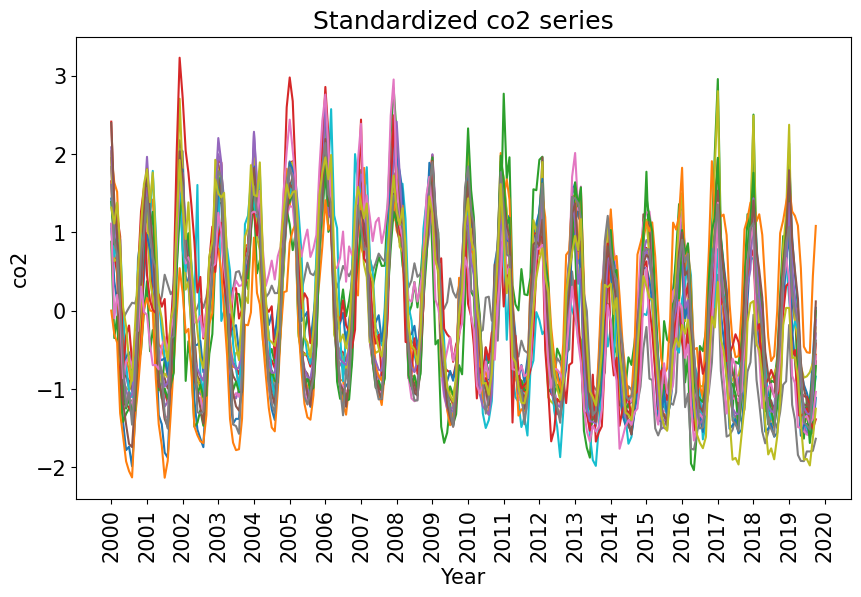

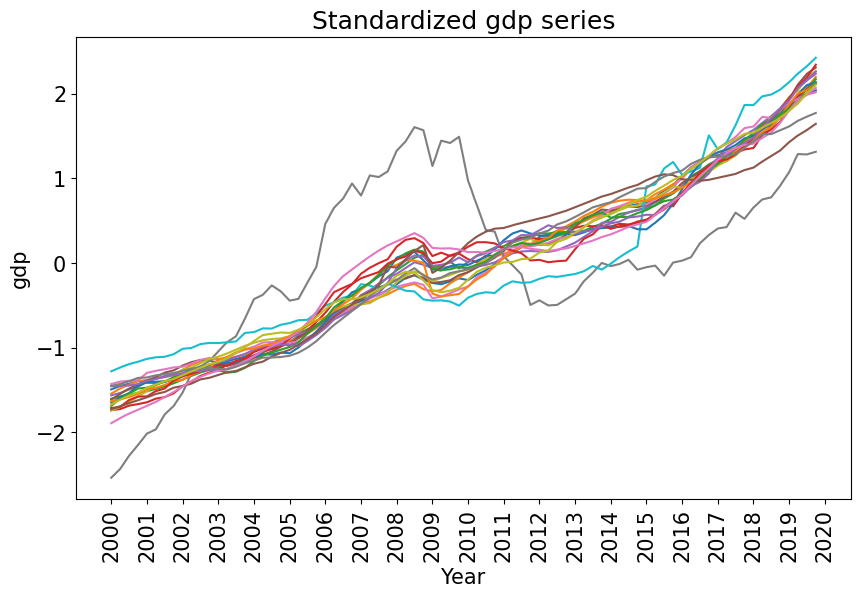

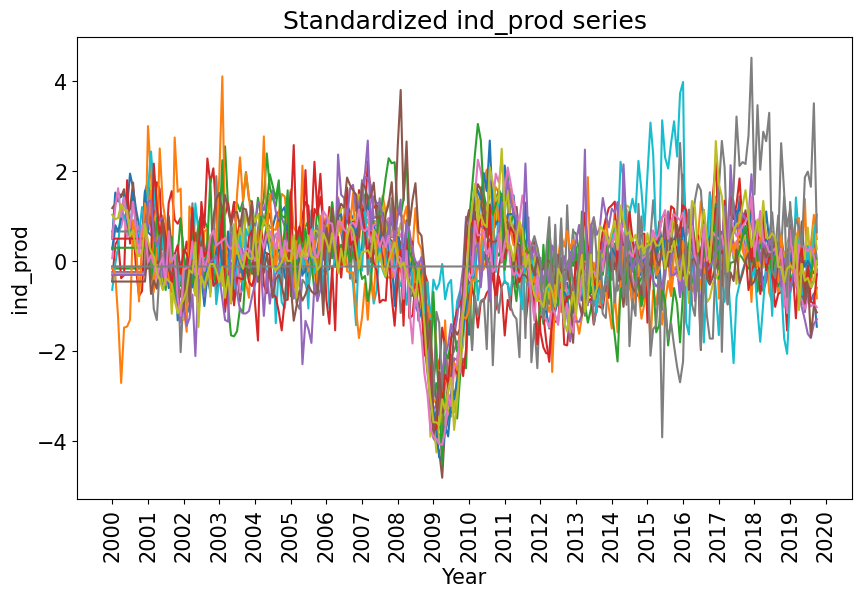

C:\Users\Bas\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Bas\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Bas\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


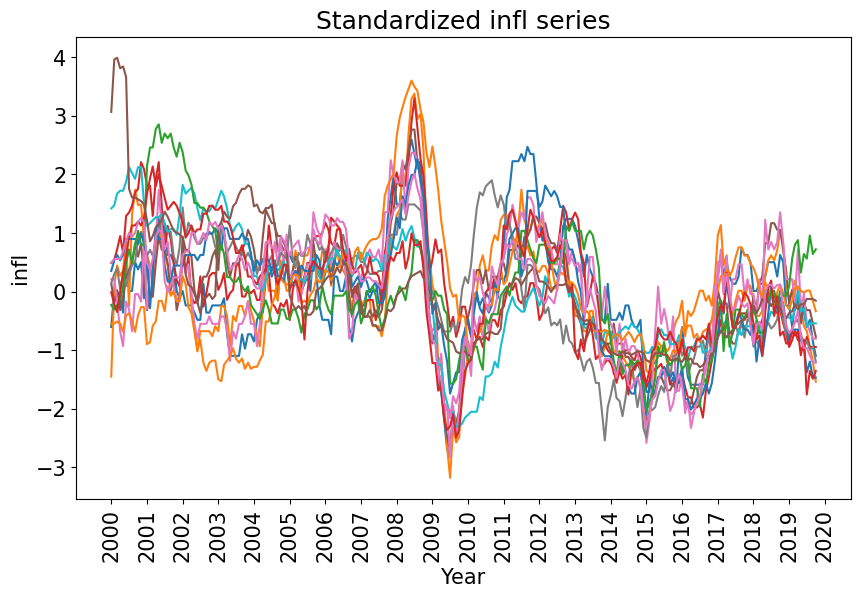

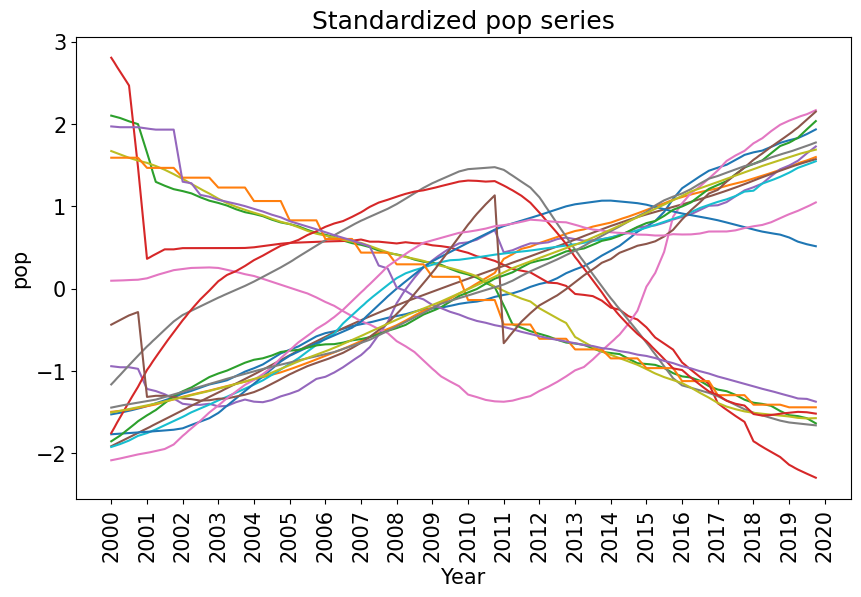

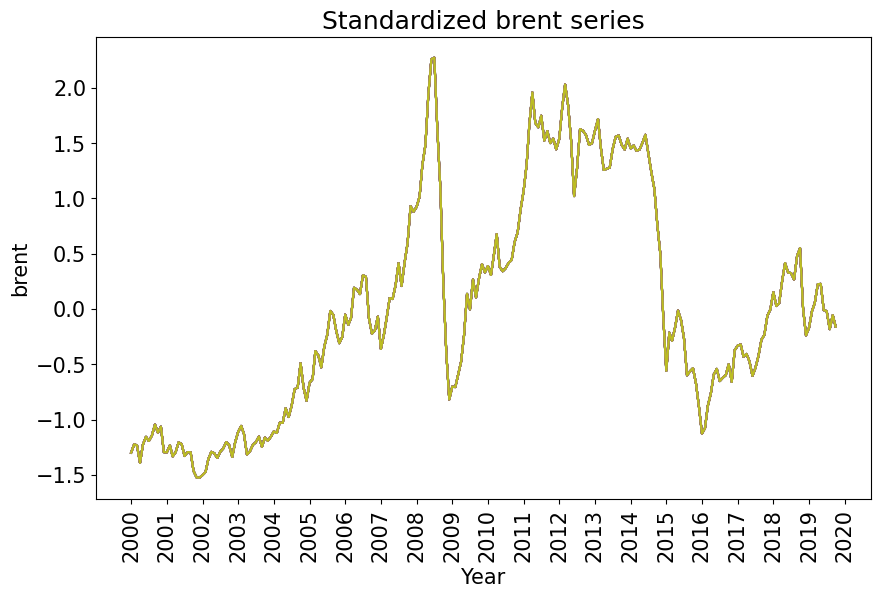

In [20]:
def all_series_stand(df: object, timeframe: str):
    timescale = get_timescale(timeframe=timeframe)
    trans = get_trans(timeframe=timeframe)

    scaler = StandardScaler()
    
    for series in trans.keys():

        df_pivot = df.pivot(index=date_col, columns=country_col, values=series)
        df_pivot.index = pd.to_datetime(df_pivot.index)
        df_scale = scaler.fit_transform(df_pivot)

        fig, ax = plt.subplots(figsize=fig_size)
        ax.plot(df_pivot.index, df_scale, label=df_pivot.columns)

        ax.xaxis.set_major_locator(mdates.YearLocator())
        for tick in ax.get_xticklabels():
            tick.set_rotation(90)
        ax.set_title(f'Standardized {series} series')
        ax.set_xlabel('Year')
        ax.set_ylabel(f'{series}')
#         ax.legend()
#         plt.savefig(f"{series}_stand.png", bbox_inches='tight')
        plt.show()
            
all_series_stand(df, timeframe=timeframe)

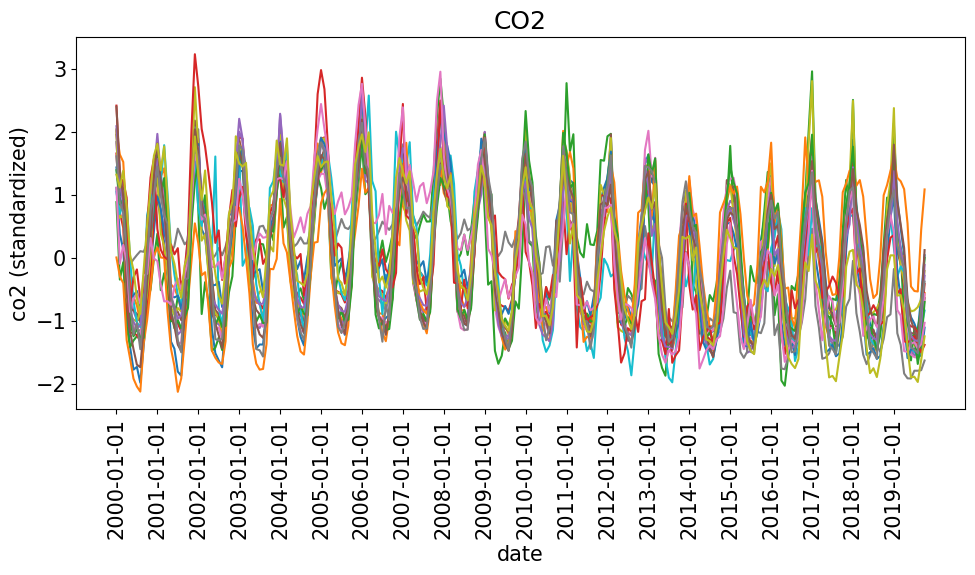

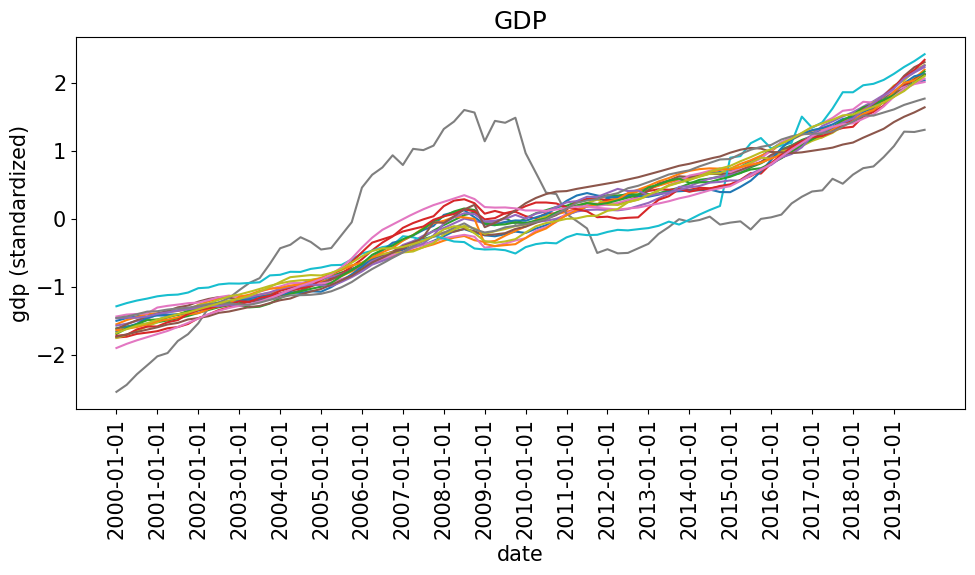

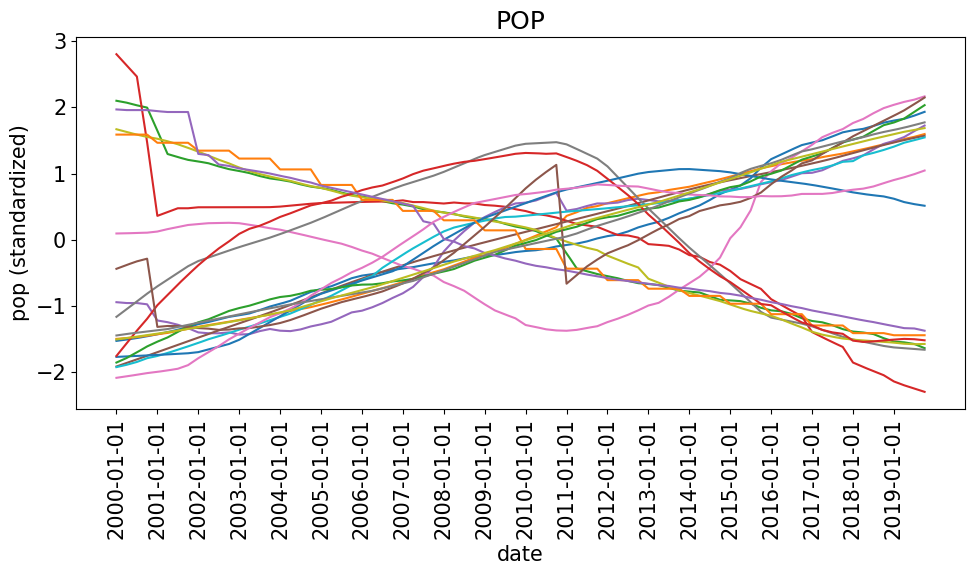

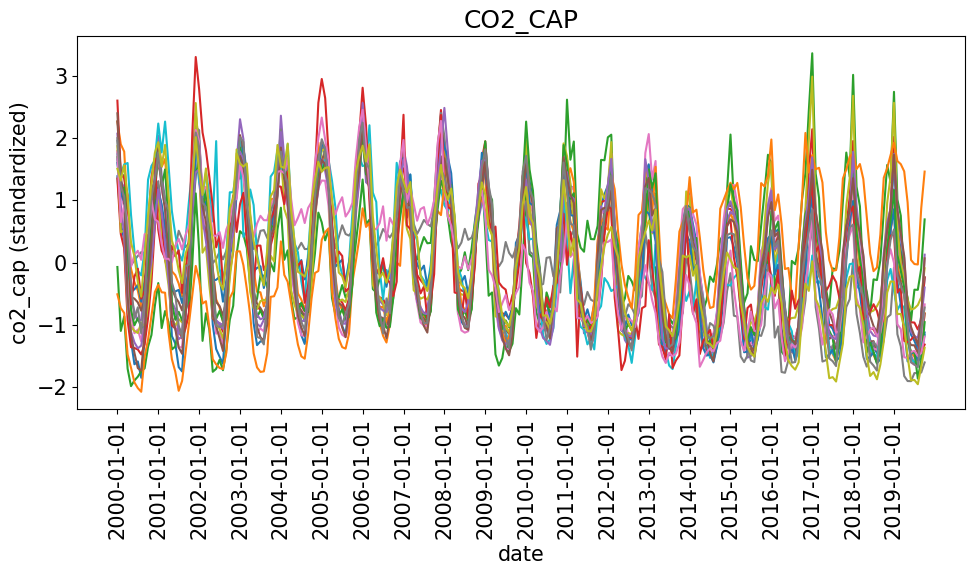

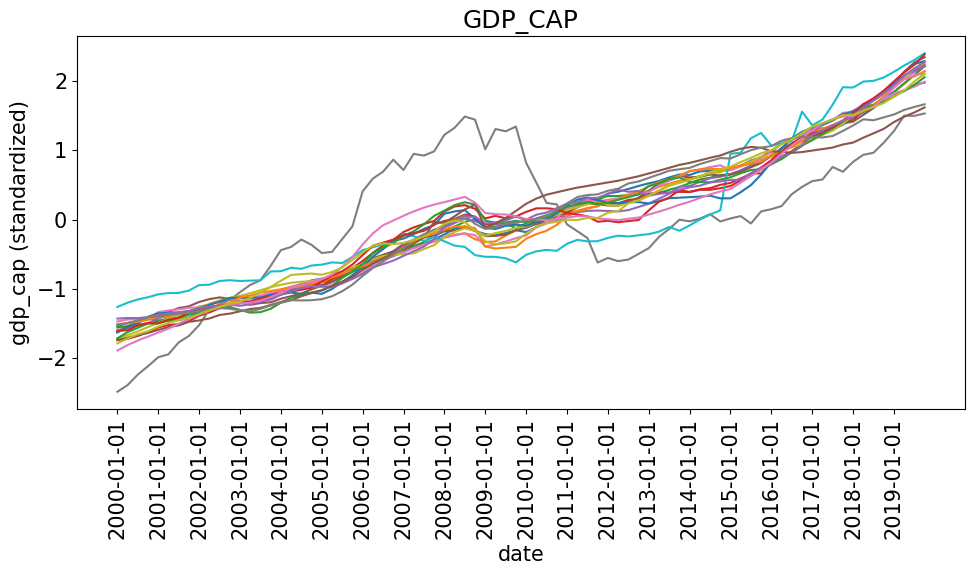

In [12]:
# def all_series_stand(df: object, timeframe: str):
#     timescale = get_timescale(timeframe=timeframe)
#     trans = get_trans(timeframe=timeframe)

#     scaler = StandardScaler()
#     for series in trans.keys():

#         df_pivot = df.pivot(index=date_col, columns=country_col, values=series)
#         df_pivot.index = pd.to_datetime(df_pivot.index)
#         df_scale = scaler.fit_transform(df_pivot)

#         plt.figure(figsize=fig_size)
#         plt.plot(df_pivot.index, df_scale, label=df_pivot.columns)

#         plt.title(series.upper())
#         plt.xticks([df_pivot.index[timescale * i] for i in range(int(len(df_pivot) / timescale + 1))], rotation='vertical')
#         plt.xlabel('Year')
#         plt.ylabel(f"Standardized {series} series")
#         plt.tight_layout()
#         if save_figs:
#             plt.savefig(f"{series}_stand.png")
#         if show_plots:
#             plt.show()
            
# all_series_stand(df, timeframe=timeframe)

# Correlation plot

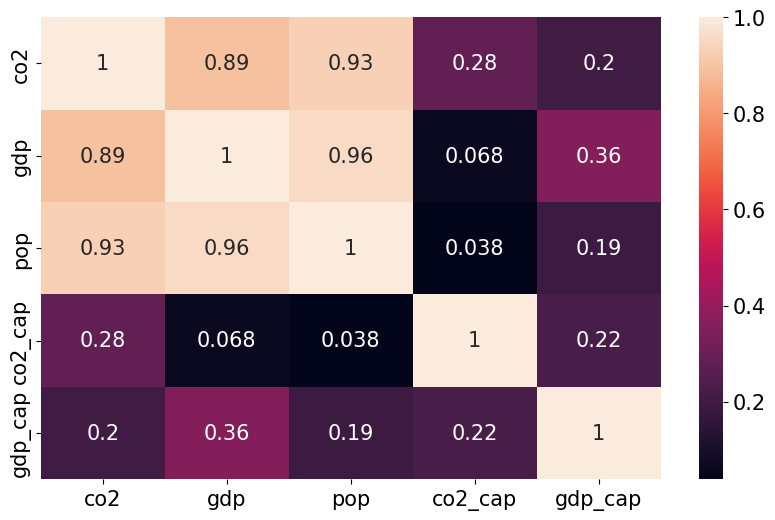

In [13]:
def corr_matrix(df: object):
    df_cor = df.copy()
#     df_cor = df_cor[df_cor[country_col] == treatment_country]
    df_cor = df_cor[get_trans()]
    cor_matrix = df_cor.corr()
    plt.figure(figsize=fig_size)
    plt.tight_layout()
    sns_plot = sns.heatmap(cor_matrix, annot=True)
    sns_plot.figure.savefig(f"{figures_path_meth_eda}corr_matrix.png")
    plt.show()
        
corr_matrix(df)

# CO2 focus

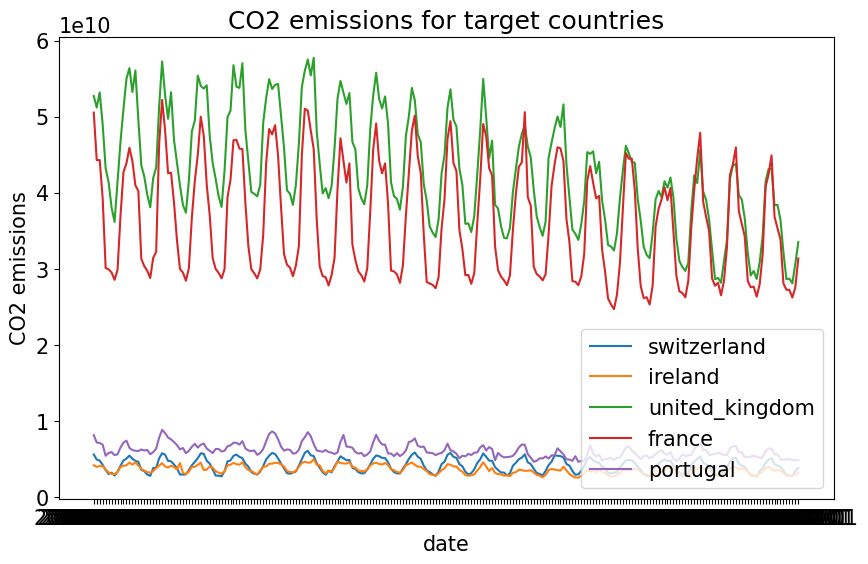

In [33]:
df_target = df[df['country'].isin(treatment_countries)]
df_target = df_target.set_index('date')[['country','co2']]
df_target

plt.figure(figsize=fig_size)
for country in treatment_countries:
    plt.plot(df_target[df_target['country']==country]['co2'], label=country)
plt.title('CO2 emissions for target countries')
plt.xlabel('date')
plt.ylabel('CO2 emissions')
plt.legend(loc='lower right')
plt.show()

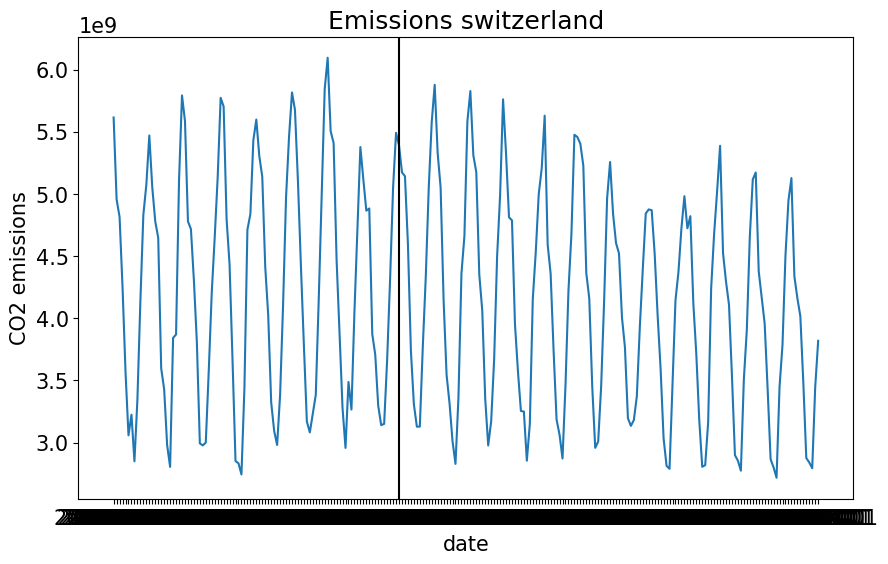

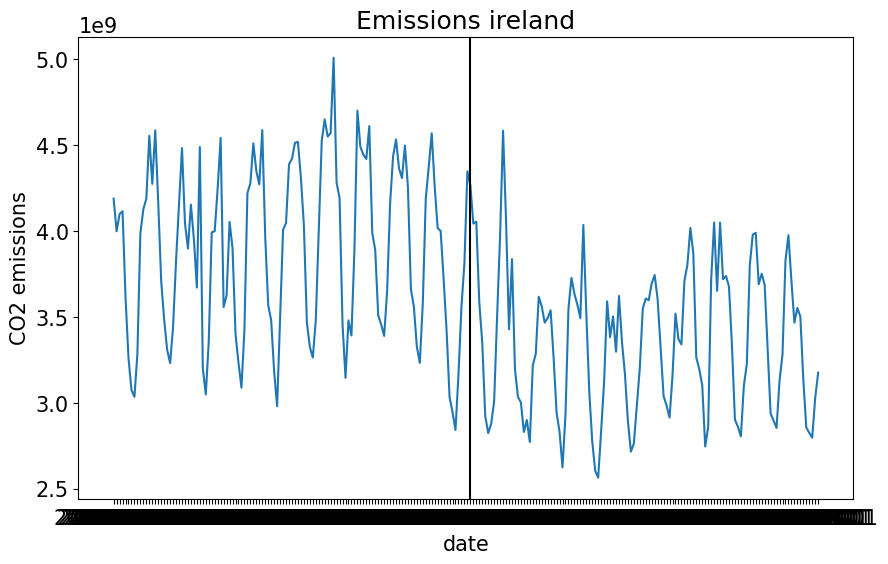

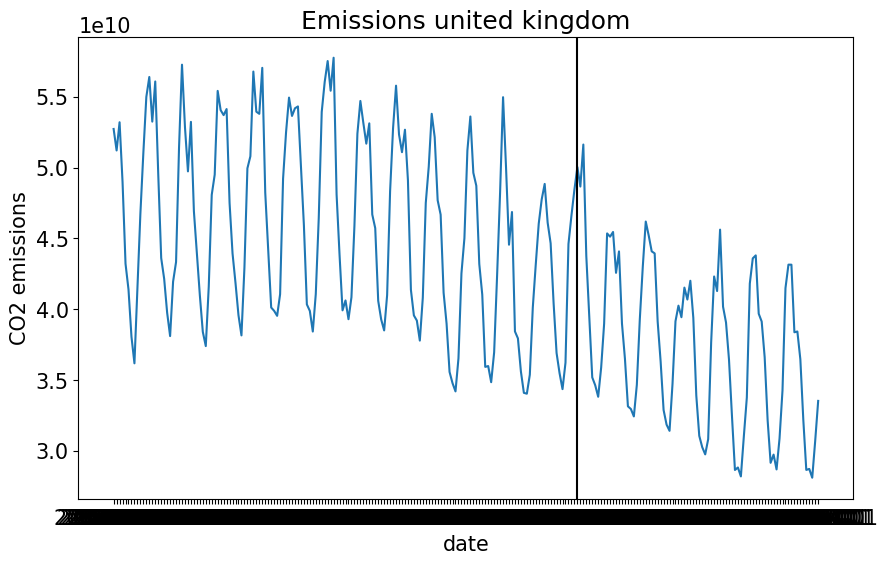

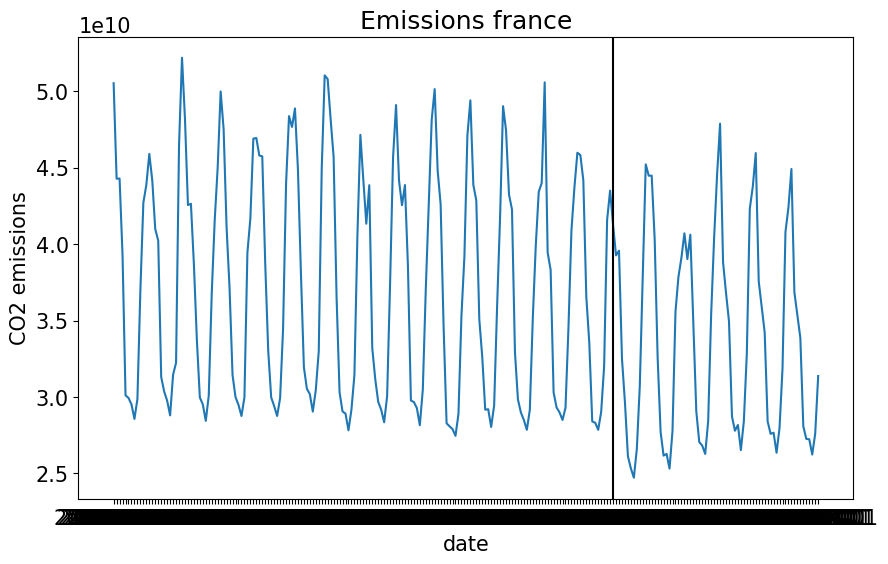

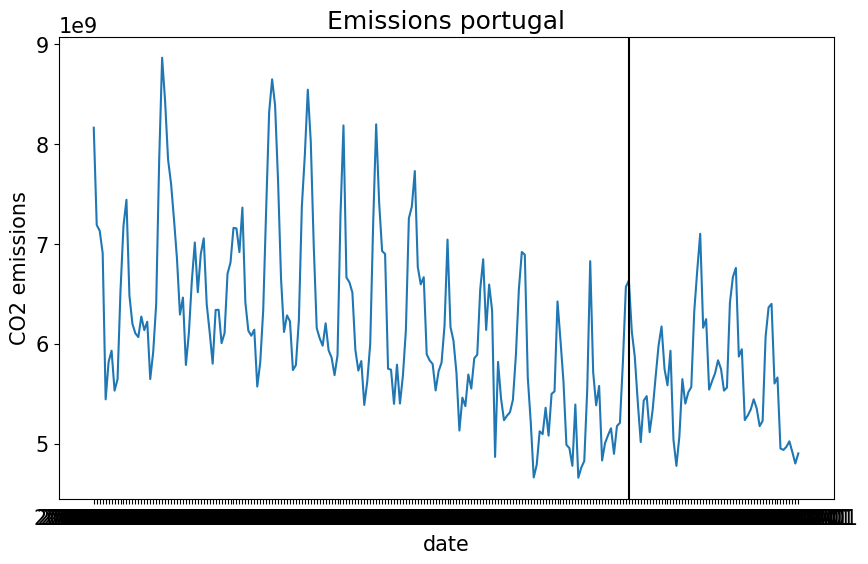

In [15]:
i = 1
for country in treatment_countries:
    df_country = df[df['country']==country].set_index('date')['co2']
    
    plt.figure(i, figsize=fig_size)
    plt.plot(df_country, label=country)
    plt.axvline(x=get_impl_date(country), c='black')
    plt.title(f'Emissions {country}')
    plt.xlabel('date')
    plt.ylabel('CO2 emissions')
    plt.savefig(f"{figures_path_meth_eda}co2_{country}.png")
    plt.show()
    i += 1                                                               

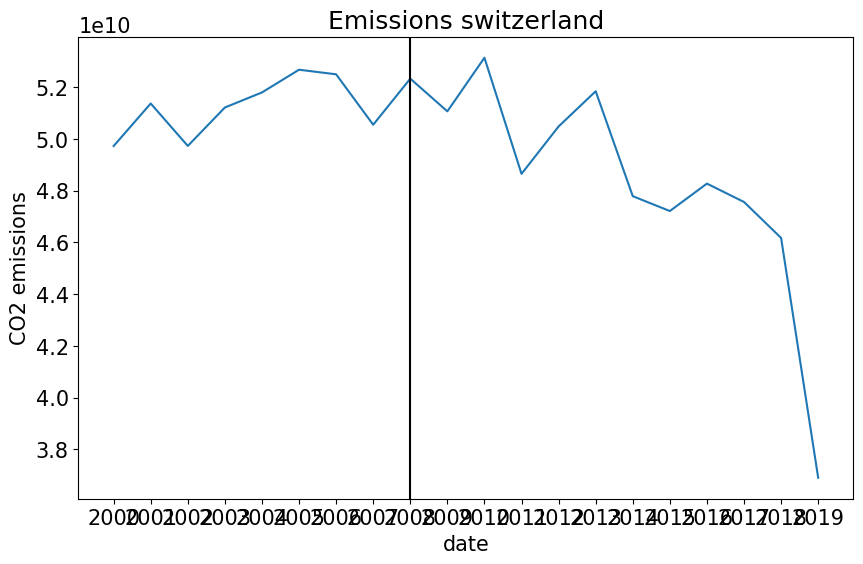

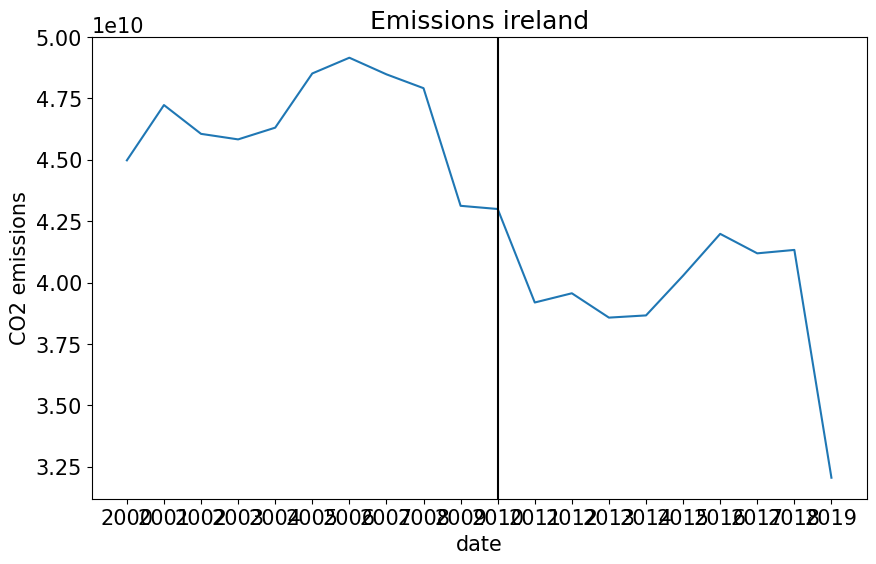

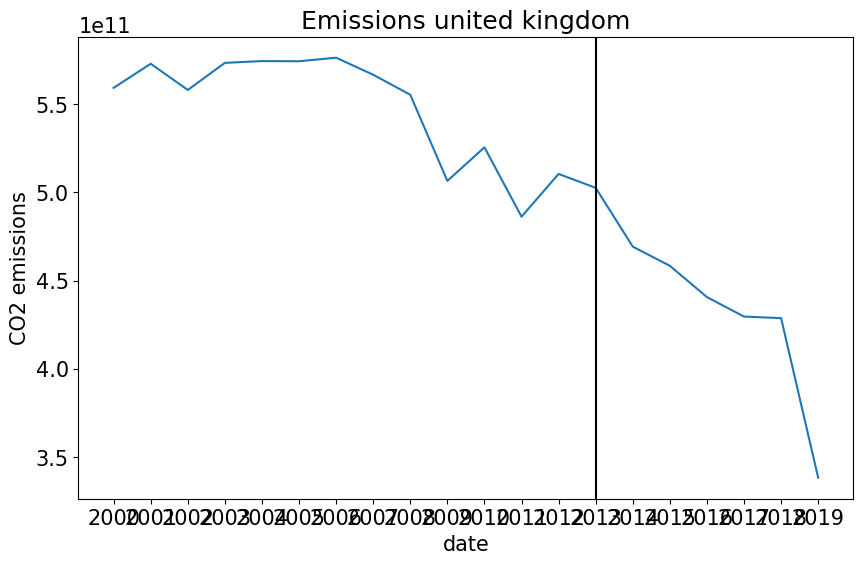

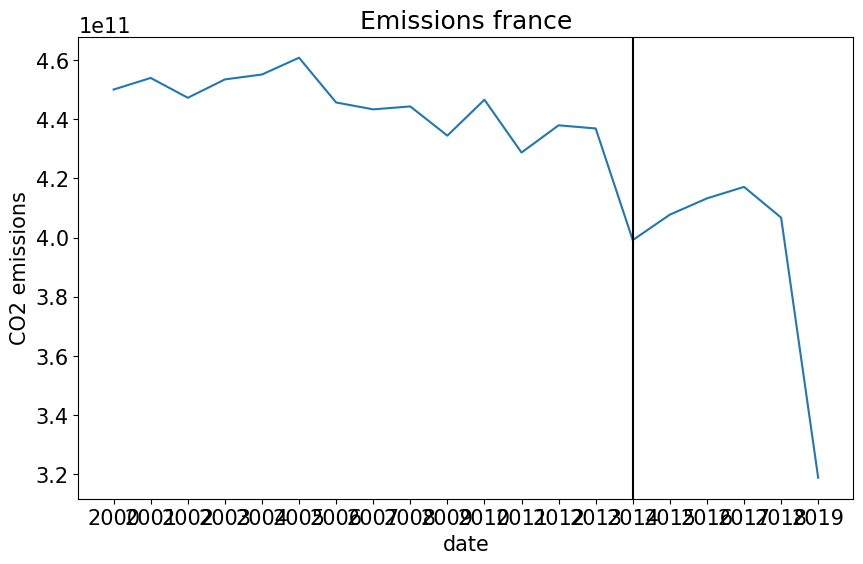

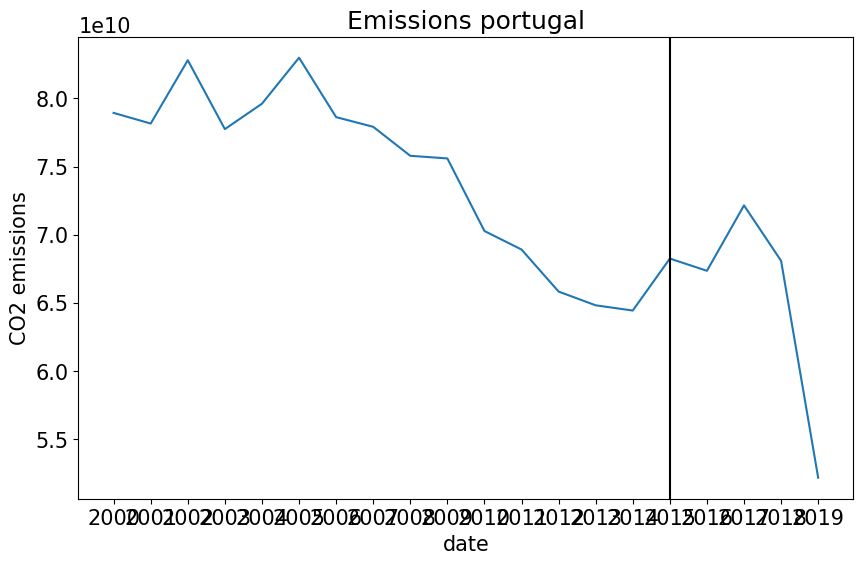

In [17]:
# grouped

i = 1
for country in treatment_countries:
    df['year'] = df['year'].astype(str)
    df_country = df[df['country']==country].set_index('date')[['year', 'co2']].groupby('year').sum()
    
    plt.figure(i, figsize=fig_size)
    plt.plot(df_country, label=country)
    plt.axvline(x=get_impl_date(country)[:4], c='black')
    plt.title(f'Emissions {country}')
    plt.xlabel('date')
    plt.ylabel('CO2 emissions')
    plt.savefig(f"{figures_path_meth_eda}co2_{country}_group.png")
    plt.show()
    i += 1

# Stationarity

In [18]:
df_stat = read_data(get_data_path(timeframe='m'), file_name='total_m_non_stat')
df_stat

,country,date,year,month,co2,gdp,pop,co2_cap,gdp_cap
0,austria,2002-01-01,2002,1,0.052060,0.009157,0.001714,0.069483,0.007443
1,austria,2002-02-01,2002,2,-0.025243,0.020299,0.001568,-0.066421,0.018731
2,austria,2002-03-01,2002,3,0.018000,0.031382,0.001422,-0.005582,0.029961
3,austria,2002-04-01,2002,4,0.028786,0.042408,0.001275,-0.092207,0.041132
4,austria,2002-05-01,2002,5,0.054459,0.047218,0.001162,0.028971,0.046056
...,...,...,...,...,...,...,...,...,...
4061,united kingdom,2019-06-01,2019,6,-0.017357,0.020092,-0.000658,-0.034180,0.020749
4062,united kingdom,2019-07-01,2019,7,-0.034553,0.023307,-0.000707,-0.064917,0.024013
4063,united kingdom,2019-08-01,2019,8,-0.020662,0.025343,-0.000756,-0.037323,0.026098
4064,united kingdom,2019-09-01,2019,9,-0.005156,0.027362,-0.000805,0.000994,0.028167


<AxesSubplot:xlabel='date'>

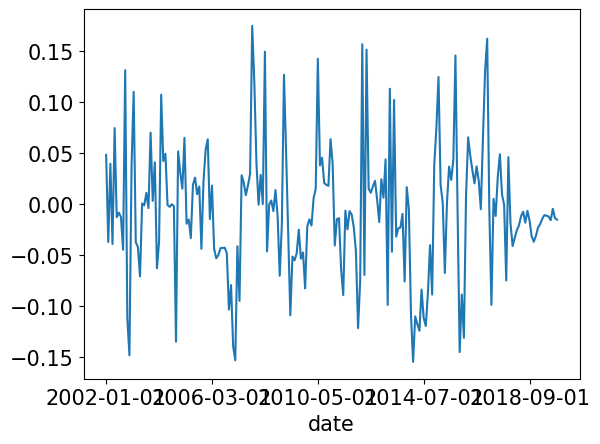

In [19]:
df_stat[df_stat['country']=='france'].set_index('date')['co2'].plot()

<AxesSubplot:xlabel='date'>

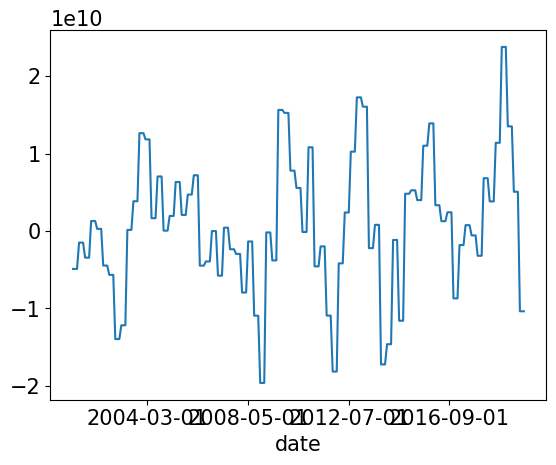

In [20]:
df[df['country']=='france'].set_index('date')['gdp'].diff(12).plot()

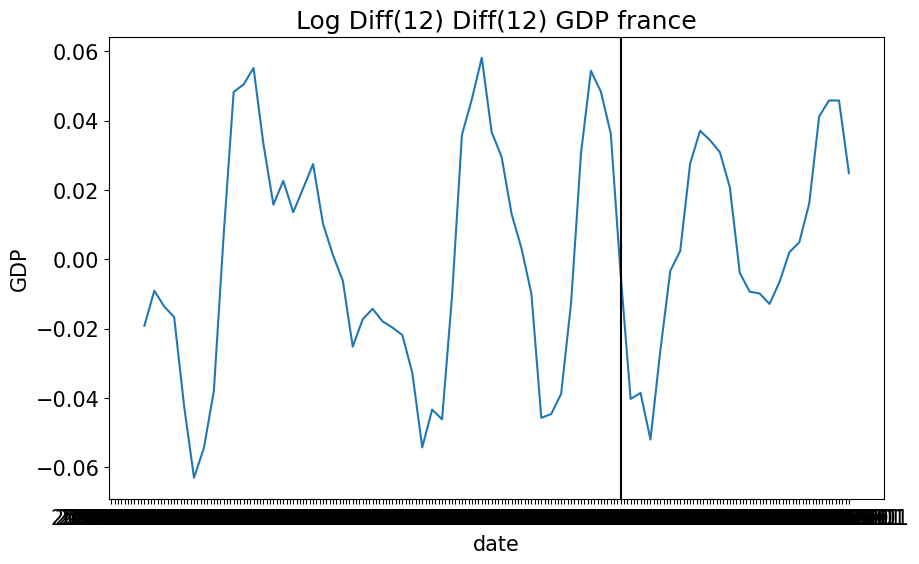

In [42]:
for country in ['france']:
    df_country = np.log(df[df['country']==country].set_index('date')['gdp']).diff(12).diff(12)
    
    plt.figure(i, figsize=fig_size)
    plt.plot(df_country, label=country)
    plt.axvline(x=get_impl_date(country), c='black')
    plt.title(f'Log Diff(12) Diff(12) GDP {country}')
    plt.xlabel('date')
    plt.ylabel('GDP')
    plt.savefig(f"{figures_path_meth_eda}gdp_{country}_log_diff12_diff12.png")
    plt.show()
    i += 1   

# Autocorrelation (ACF & PACF)

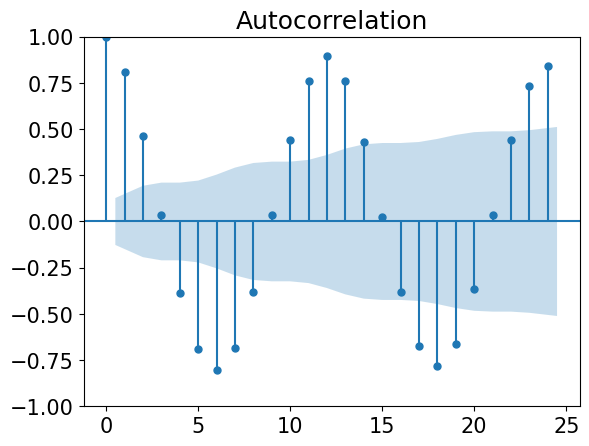

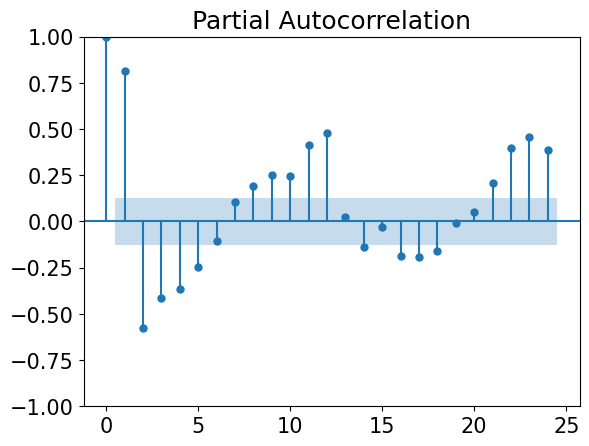

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 
series = df[df['country']=='france'].set_index('date')['co2']
plot_acf(series, lags=24);
plot_pacf(series, lags=24)
plt.show()

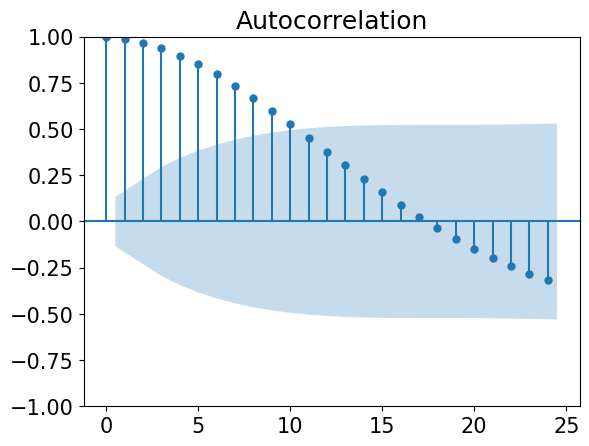

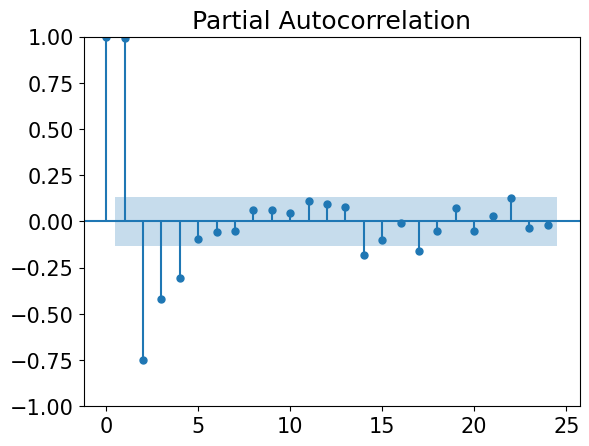

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 
series_stat = df_stat[df_stat['country']=='france'].set_index('date')['pop']
plot_acf(series_stat, lags=24);
plot_pacf(series_stat, lags=24)
plt.show()